# Weather Stats EDA and Question Set

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc

## 1: Ingest full input data and extract the meaningful subset

In [2]:
full_raw = pd.read_csv('../data/weather_statistics.csv')
full_raw

/tmp/ipykernel_14990/2545342639.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  full_raw = pd.read_csv('../data/weather_statistics.csv')


,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,...,MXSPD,GUST,MAX,MAX_ATTRIBUTES,MIN,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT
0,72282303749,01-06-2023,39.645000,-77.468000,563.0,"CAMP DAVID, MD US",35.7,4,29.5,4,...,17.1,33.0,37.9,*,34.0,*,0.01,G,999.9,10000
1,72282303749,01-07-2023,39.645000,-77.468000,563.0,"CAMP DAVID, MD US",33.2,20,26.6,20,...,12.0,24.1,36.0,*,30.9,*,0.00,G,999.9,0
2,72282303749,01-08-2023,39.645000,-77.468000,563.0,"CAMP DAVID, MD US",29.4,24,23.1,24,...,12.0,25.1,36.0,,24.1,,0.00,I,999.9,0
3,72282303749,01-19-2023,39.645000,-77.468000,563.0,"CAMP DAVID, MD US",35.9,23,33.2,23,...,14.0,24.1,39.9,,34.0,,0.02,G,999.9,110000
4,72282303749,01-20-2023,39.645000,-77.468000,563.0,"CAMP DAVID, MD US",37.3,24,30.6,24,...,17.1,35.9,41.0,,34.0,,0.41,G,999.9,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15991410,48358099999,12-27-2024,17.433333,104.783333,153.0,"NAKHON PHANOM AGROMET, TH",73.1,24,60.6,21,...,7.0,999.9,88.5,,59.9,,0.00,I,999.9,0
15991411,48358099999,12-28-2024,17.433333,104.783333,153.0,"NAKHON PHANOM AGROMET, TH",67.2,24,55.3,20,...,15.0,999.9,80.8,,54.5,,0.00,I,999.9,0
15991412,48358099999,12-29-2024,17.433333,104.783333,153.0,"NAKHON PHANOM AGROMET, TH",67.6,24,54.4,20,...,7.0,999.9,82.8,,53.6,,0.00,I,999.9,0
15991413,48358099999,12-30-2024,17.433333,104.783333,153.0,"NAKHON PHANOM AGROMET, TH",69.7,24,57.3,18,...,7.0,999.9,85.6,,53.2,,0.00,I,999.9,0


In [6]:
full_raw.DATE = pd.to_datetime(full_raw.DATE)
june_raw = full_raw.loc[full_raw.DATE.dt.month == 6].copy()
del full_raw
gc.collect()
june_raw.head()

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,...,MXSPD,GUST,MAX,MAX_ATTRIBUTES,MIN,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT
73,72282303749,2023-06-01,39.645000,-77.468000,563.0,"CAMP DAVID, MD US",71.6,23,40.7,23,...,7.0,999.9,91.0,,52.0,,0.00,I,999.9,0
74,72282303749,2023-06-02,39.645000,-77.468000,563.0,"CAMP DAVID, MD US",79.6,24,45.2,24,...,7.0,999.9,98.1,,57.0,,0.00,I,999.9,0
75,72282303749,2023-06-03,39.645000,-77.468000,563.0,"CAMP DAVID, MD US",77.2,24,54.3,24,...,8.9,17.1,98.1,,66.9,,0.00,I,999.9,0
76,72282303749,2023-06-04,39.645000,-77.468000,563.0,"CAMP DAVID, MD US",66.6,24,49.7,24,...,11.1,21.0,89.1,,55.9,,0.00,I,999.9,0
77,72282303749,2023-06-05,39.645000,-77.468000,563.0,"CAMP DAVID, MD US",66.6,24,38.4,24,...,7.0,999.9,82.9,,53.1,,0.00,I,999.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15991232,48358099999,2024-06-26,17.433333,104.783333,153.0,"NAKHON PHANOM AGROMET, TH",79.9,23,77.1,13,...,5.1,999.9,87.3,,75.9,,0.37,G,999.9,10010
15991233,48358099999,2024-06-27,17.433333,104.783333,153.0,"NAKHON PHANOM AGROMET, TH",81.6,24,77.4,15,...,5.1,999.9,87.4,,75.2,,0.01,G,999.9,10000
15991234,48358099999,2024-06-28,17.433333,104.783333,153.0,"NAKHON PHANOM AGROMET, TH",79.6,24,76.7,12,...,6.0,999.9,91.4,,74.5,,3.00,G,999.9,10010
15991235,48358099999,2024-06-29,17.433333,104.783333,153.0,"NAKHON PHANOM AGROMET, TH",81.0,24,78.7,14,...,4.1,999.9,91.4,,74.5,,0.01,G,999.9,10010


In [16]:
COLUMNS = ['STATION', 'DATE', 'NAME', 'TEMP']
june_subset = june_raw[COLUMNS].copy()
june_subset.head()

,STATION,DATE,NAME,TEMP
73,72282303749,2023-06-01,"CAMP DAVID, MD US",71.6
74,72282303749,2023-06-02,"CAMP DAVID, MD US",79.6
75,72282303749,2023-06-03,"CAMP DAVID, MD US",77.2
76,72282303749,2023-06-04,"CAMP DAVID, MD US",66.6
77,72282303749,2023-06-05,"CAMP DAVID, MD US",66.6


In [17]:
# summary stats
june_subset.describe()

,DATE,TEMP
count,1308095,1.308095e+06
mean,2022-12-15 21:09:07.350153728,6.808558e+01
min,2021-06-01 00:00:00,-1.069000e+02
25%,2021-06-30 00:00:00,5.910000e+01
50%,2023-06-01 00:00:00,6.890000e+01
75%,2024-06-01 00:00:00,7.840000e+01
max,2024-06-30 00:00:00,1.100000e+02
std,NaN,1.438908e+01


In [18]:
# DOME FUJI is in Antarctica (AY) so appears legitimate
june_subset.loc[june_subset.TEMP == june_subset.TEMP.min()]

,STATION,DATE,NAME,TEMP
8759366,89734099999,2021-06-13,"DOME FUJI, AY",-106.9


## 2: Check for data sparsity and invalid temperature readings

In [20]:
june_subset.info() #dtypes are suitable

<class 'pandas.core.frame.DataFrame'>
Index: 1308095 entries, 73 to 15991236
Data columns (total 4 columns):
 #   Column   Non-Null Count    Dtype         
---  ------   --------------    -----         
 0   STATION  1308095 non-null  object        
 1   DATE     1308095 non-null  datetime64[ns]
 2   NAME     1303971 non-null  object        
 3   TEMP     1308095 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 49.9+ MB


In [22]:
# % missing is low
(june_subset.isna().mean() * 100).sort_values(ascending=False).to_frame("percent_missing")

,percent_missing
NAME,0.315268
STATION,0.000000
DATE,0.000000
TEMP,0.000000


In [15]:
print(f'Approximately {(june_raw.loc[june_raw.NAME.isna()].STATION.nunique() 
                        / june_raw.STATION.nunique() * 100)} percent of station names are missing')

Approximately 0.3179547076763351 percent of station names are missing


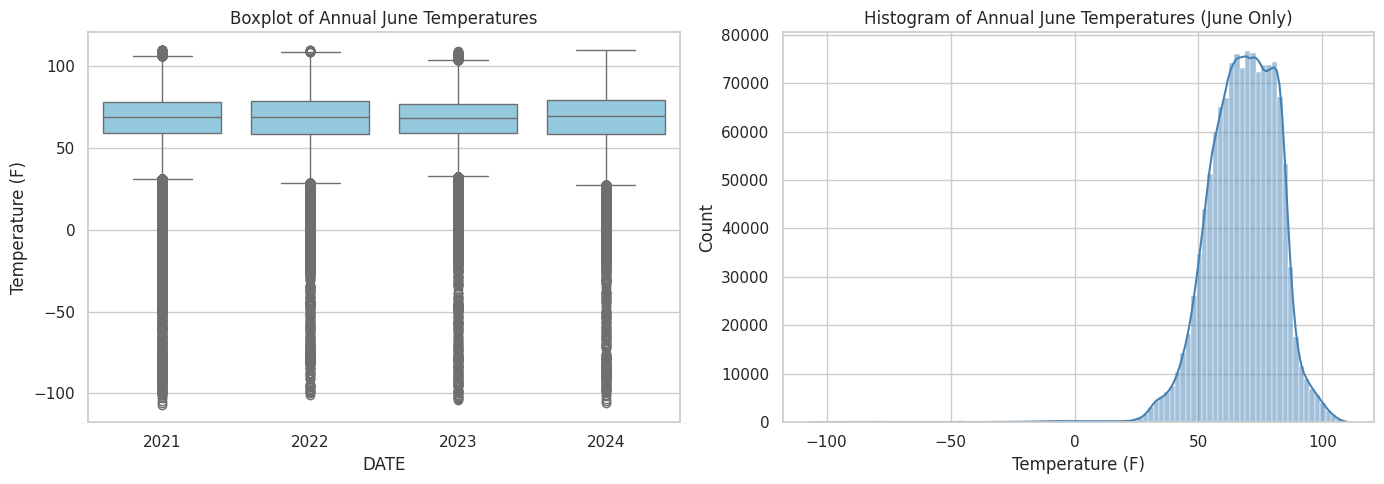

In [25]:
# visualize temperatures for gaps and outliers
sns.set_theme(style='whitegrid')

fig, axs = plt.subplots(1, 2, figsize=(14,5))

sns.boxplot(x=june_subset.DATE.dt.year, y=june_subset.TEMP, ax=axs[0], color='skyblue')
axs[0].set_title('Boxplot of Annual June Temperatures')
axs[0].set_ylabel('Temperature (F)')

sns.histplot(june_subset.TEMP, bins=100, kde=True, ax=axs[1], color='steelblue')
axs[1].set_title('Histogram of Annual June Temperatures (June Only)')
axs[1].set_xlabel('Temperature (F)')

plt.tight_layout()
plt.show()

Based on these plots, I'm comfortable proceeding with the data as-is. There could be some value in exploring the outliers that go into the negatives for inaccuracy. But in this context, we'll begin analysis.

### Q1: Extract the Stations and Years where/when the greatest number of June days with temperatures above 30C were recorded.
#### Order by Max Temp, then Station Name. Output 10 rows.

In [49]:
june_subset['YEAR'] = june_subset.DATE.dt.year # save explicit year col for convenience
june_subset['DEG_C'] = (june_subset.TEMP - 32) * 5 / 9 # F to C conversion

hottest_junes = june_subset.copy()
hottest_junes['EXCEEDS_30'] = np.where(hottest_junes.DEG_C > 30, True, False)
hottest_junes['MAX_MONTHLY_TEMP'] = hottest_junes.groupby('STATION').DEG_C.transform('max')
hottest_junes.loc[hottest_junes.EXCEEDS_30].groupby(['NAME', 'YEAR', 'MAX_MONTHLY_TEMP'], as_index=False).agg(
    DAYS_EXCEEDING_30_C=('DATE', 'nunique')).sort_values(
        by=['DAYS_EXCEEDING_30_C', 'MAX_MONTHLY_TEMP', 'NAME'], ascending=[False, False, True]).reset_index(drop=True).head(10)[['NAME', 'YEAR']]



,NAME,YEAR
0,"LAMERD, IR",2024
1,"NASIRIYA, IZ",2021
2,"AGHAJARI, IR",2022
3,"AGHAJARI, IR",2023
4,"AGHAJARI, IR",2024
5,"SHAHBAZ AB, PK",2024
6,"RHOURD NOUSS, AG",2021
7,"KUWAIT INTERNATIONAL, KU",2021
8,"KUWAIT INTERNATIONAL, KU",2022
9,"KUWAIT INTERNATIONAL, KU",2023


IR, IZ, PK, AG, and KU are the hottest stations across the months of June

### Q2: How many stations had a higher average June temperature in 2024 than in 2021?

In [62]:
above_avgs = june_subset.copy()
# get monthly avg temp in C
above_avgs = above_avgs.groupby(['STATION', 'YEAR'], as_index=False).agg(MEAN_DEG_C=('DEG_C', 'mean'))

# author's note: this is not production code; snazzy one liners are typically less legible than more verbose, clearly written code. this could be broken up into several steps for readability
above_avgs = above_avgs.loc[above_avgs.YEAR == 2021][['STATION', 'MEAN_DEG_C']].rename({'MEAN_DEG_C':'2021_MEAN_DEG_C'}, axis=1).merge(
    above_avgs.loc[above_avgs.YEAR == 2024][['STATION', 'MEAN_DEG_C']].rename({'MEAN_DEG_C':'2024_MEAN_DEG_C'}, axis=1),
    how='left', on='STATION'
)
above_avgs['GETTING_HOTTER'] = np.where(above_avgs['2024_MEAN_DEG_C'] > above_avgs['2021_MEAN_DEG_C'], True, False)
print(f'There are {above_avgs.loc[above_avgs.GETTING_HOTTER].STATION.nunique()} stations with a higher average June temperature in 2024 than 2021')

There are 4675 stations with a higher average June temperature in 2024 than 2021


### Q3: How many stations did not record a single June day with a temperature below 20C?

In [69]:
never_colds = june_subset.copy()
never_colds['MIN_DEG_C'] = never_colds.groupby('STATION').DEG_C.transform('min')
print(f'There are {never_colds.loc[never_colds.MIN_DEG_C >= 20].STATION.nunique()} stations that did not record a single June day with a temperature below 20C')

There are 3707 stations that did not record a single June day with a temperature below 20C
